In [ ]:
'''

Purpose of this project,converting multiple csv file containing the coordinates into 1 excel file containing the 
Unique coordinates values. We have multiple csv file containing Latitude/Longitude present in folder. File count can be differ.
We are giving the User defined name to the Excel file using Tkinter.

'''

In [5]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import glob, os

os.chdir("/Users/shreyasrane87/Desktop/Github/Unique_Coordinates from multiple_CSV")


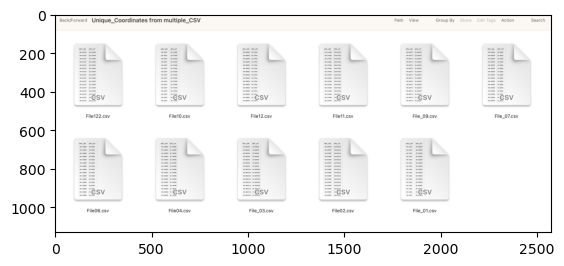

In [6]:
#We have multiple csv file containing Latitude/Longitude present in folder.
from matplotlib import image as img
from matplotlib import pyplot as plt
image = img.imread("Multiple_CSV_File.png")
plt.imshow(image)


In [8]:

from tkinter import *
root = Tk()
root.title("Please enter the File Name")
root.geometry("350x150+0+0")

#heading1 = Label(root, text="Enter Relation Scripts Data",font=("arial",25,"bold","underline"),fg="navy").place(x=100,y=40)

#label1 = Label(root, text="Enter the Site Id",font=("arial",20,"bold"),fg="black").place(x=10,y=150)

xyz = StringVar()

entry_box = Entry(root, textvariable=xyz, width = 25 , bg="aqua").place(x=40,y=50)

def close_win():
   root.destroy()

Button(root, text= "Enter", font=('Poppins bold', 16),command=close_win).place(x=250,y=50)

root.mainloop()

In [9]:

files = glob.glob('/Users/shreyasrane87/Desktop/Github/Unique_Coordinates from multiple_CSV/*.csv')
#print (files)
#['samples_for_so\\a.csv', 'samples_for_so\\b.csv', 'samples_for_so\\c.csv']


df1 = pd.concat([pd.read_csv(fp).assign(FileName=os.path.basename(fp)) for fp in files])
#print (df)

In [10]:
df2=df1[["FileName","GPS_LON","GPS_LAT"]]

In [11]:
df2['coordinates'] = [', '.join(str(x) for x in y) for y in map(tuple, df2[['GPS_LAT', 'GPS_LON']].values)]

/var/folders/mk/w5v6m8s178qb6zq684k2w9xh0000gn/T/ipykernel_5881/785168451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['coordinates'] = [', '.join(str(x) for x in y) for y in map(tuple, df2[['GPS_LAT', 'GPS_LON']].values)]


In [12]:
df3=df2.drop_duplicates(subset=['coordinates'])

In [13]:
data1 = pd.DataFrame(df3[0:1000000])
data2 = pd.DataFrame(df3[1000000:2000000])
data3 = pd.DataFrame(df3[2000000:3000000])
data4 = pd.DataFrame(df3[3000000:4000000])

writer = pd.ExcelWriter('Coordinates.xlsx', engine='xlsxwriter')
data1.to_excel(writer, sheet_name='Sheet1',index=False)
data2.to_excel(writer, sheet_name='Sheet2',index=False)
data3.to_excel(writer, sheet_name='Sheet3',index=False)
data4.to_excel(writer, sheet_name='Sheet4',index=False)
 
writer.save()

/var/folders/mk/w5v6m8s178qb6zq684k2w9xh0000gn/T/ipykernel_5881/1909834438.py:12: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [14]:
Newfilename=xyz.get()+".xlsx"


In [15]:

path = files="/Users/shreyasrane87/Desktop/Github/Unique_Coordinates from multiple_CSV/"+Newfilename

check_file = os.path.isfile(path)

if check_file==True:
    os.remove(Newfilename)
else:
    pass

In [16]:
import os
old_name = 'Coordinates.xlsx'
new_name = Newfilename

# Renaming the file
os.rename(old_name, new_name)

In [17]:
retain = [Newfilename]

#os.chdir(working_directory)  # Change directory to your folder

# Loop through everything in folder in current working directory
for item in os.listdir(os.getcwd()):
    if item not in retain:  # If it isn't in the list for retaining
        os.remove(item) 

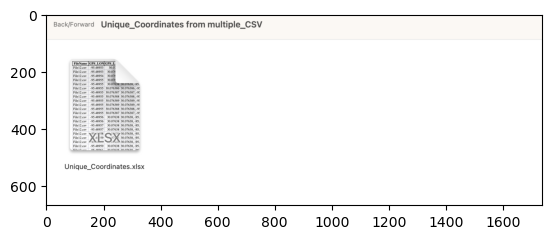

In [18]:
#1 excel file containing the  Unique coordinates value is created in the folder and all csv have been deleted.
image = img.imread("Excel containing Unique coordinate details.png")
plt.imshow(image)
